csv2grcf.py
=======
This is python script to convert csv to grc readable format.
The csv is obtained using Analog Discovery 2

In [1]:
# This is python script to convert csv to grc readable format.
# The csv is obtained using Analog Discovery 2

import numpy as np
import csv
with open('yes_interference.csv') as f:
    reader = csv.reader(f, delimiter=',')
    rate = []
    tstart = []
    dat = np.array([])
    dat1 = np.array([])
    data = np.array([])
    data1 = np.array([])
    data2 = np.array([])
    i=0
    newFile=open("test.dat", "wb+")
    newFile1=open("time.dat", "wb+")
    for row in reader:
        dat = np.array(row[:])
        if (i==1) :
            tstart=float(row[0])
            dat1 = dat.astype(np.float)
            data=np.concatenate((data, dat1))
        elif (i>1) :
            dat1 = dat.astype(np.float)
            data=np.concatenate((data, dat1))
            if ((i%10000)==0) :
                data1 = data[1:len(data):2]
                data1.astype(np.float32).tofile(newFile)
                data2 = data[0:len(data):2]-tstart
                data2.astype(np.float32).tofile(newFile1)
                dat1 = np.array([])
                data = np.array([])
                data1 = np.array([])
                data2 = np.array([])
        i=i+1
    data1=data[1:len(data):2]
    data1.astype(np.float32).tofile(newFile)
    data2=data[0:len(data):2]-tstart
    data2.astype(np.float32).tofile(newFile1)
newFile.close()
newFile1.close()

# bin2spice.py
=======
After LTSPICE simulation, the data is stored using .wave spice directive to ensure constant sampling time
To convert wave file into grc file, the following python script is used.

In [2]:
# Use csv2grcf.py to extract csv data to python binary data stored in "test.dat" and "time.dat"
# Then use this script to read from "test.dat" and "time.dat", and create the PWL file readable by LTSPICE for simulation

import numpy as np

t=np.fromfile("time.dat",np.float32)
data=np.fromfile("test.dat",np.float32)

data1=np.vstack((t,data)).T

np.savetxt('sig1.dat', data1, fmt='%.16e', delimiter=',', newline='\n', header='', footer='', comments='#')

wave2grcf
=======
After LTSPICE simulation, the data is stored using .wave spice directive to ensure constant sampling time
To convert wave file into grc file, the following python script is used.

In [9]:
# After LTSPICE simulation, the data is stored using .wave spice directive to ensure constant sampling time
# To convert wave file into grc file, the following python script is used.

import numpy as np
from scipy.io import wavfile

(fs, data) = 0, 0

(fs, data)=wavfile.read("out.wav")

data1=data/max(data)*0.25

newFile=open("testspice.dat","wb")
data1.astype(np.float32).tofile(newFile)
newFile.close()

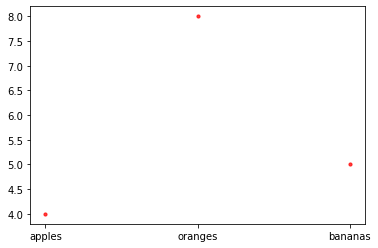

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

x = ['apples', 'oranges', 'bananas']
y = [4, 8, 5]
scatterplot(x, y)